In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

**生成高斯分布数据**

**均值为2，方差为4**

In [2]:
average = 4
sigma = 1
sample_num = [10,100,1000,10000,100000]
data = [np.random.normal(average,sigma,sample_num[i]) for i in range(len(sample_num))]

**定义计数函数cal_num（）**

In [3]:
def cal_num(x,model='hypercube'):
    if model == 'hypercube':
        if abs(x)<=0.5:
            return 1
        else:
            return 0
    elif model == 'Gaussian':
        return 1/math.sqrt(2*math.pi)*math.exp(-x*x/2)

**定义pdf估计函数**

In [4]:
def parzen_window_pdf(x,h_n,train_sample,model='hypercube'):
    total = 0
    if model=='hypercube':
        num = train_sample.size
        volume = h_n**2
        for i in range(num):
            total += cal_num((x-train_sample[i])/h_n,model='hypercube')
        return 1/num/volume*total
    elif model=='Gaussian':
        for i in range(train_sample.size):
            total += cal_num((x-train_sample[i])/h_n,model=model)
        return 1/train_sample.size/h_n*total

**开始计算**

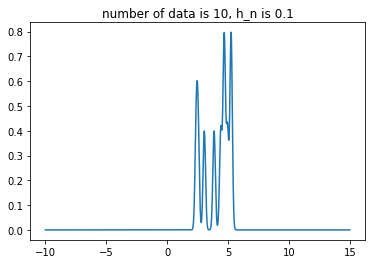

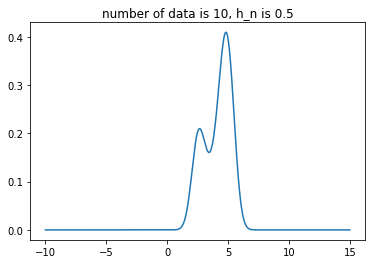

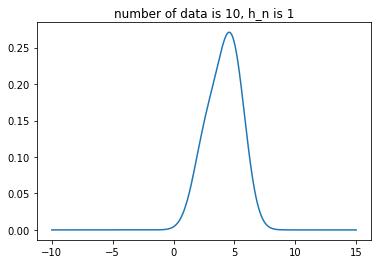

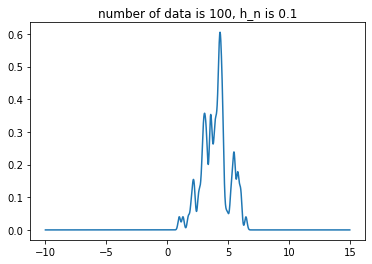

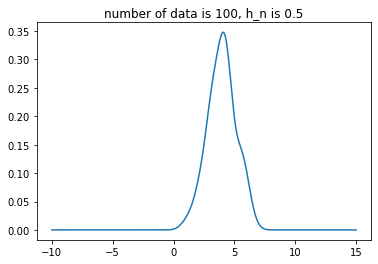

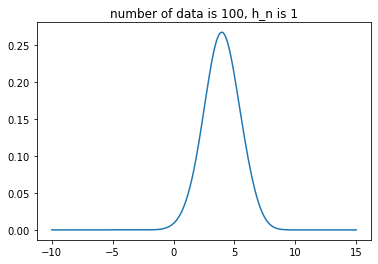

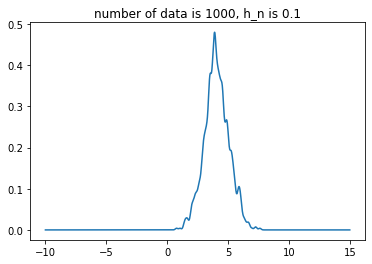

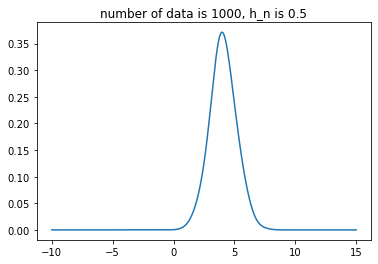

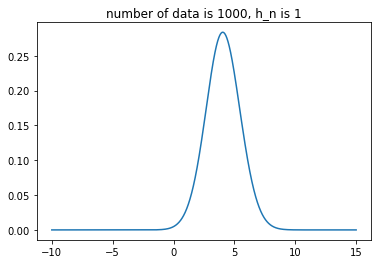

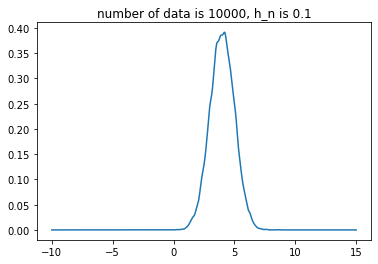

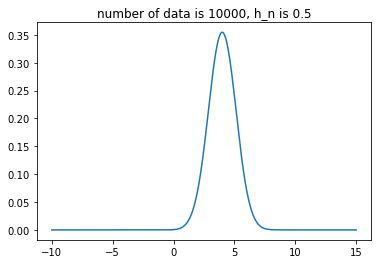

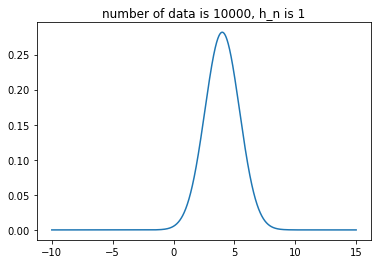

KeyboardInterrupt: 

In [5]:
p = []
h = [0.1,0.5,1]
a = []
for j in range(len(sample_num)):
    for h_n in h:
        for i in np.arange(-10,15,0.01):
            p.append(parzen_window_pdf(i,h_n,data[j],model='Gaussian'))
        plt.plot(np.arange(-10,15,0.01),p)
        plt.title('number of data is {}, h_n is {}'.format(sample_num[j], h_n))
        plt.show()
        p = []
print('success')

In [8]:
D = np.array([-3,-1,0,2,3,5])
print(parzen_window_pdf(1,math.sqrt(len(D)),D,model='Gaussian')*0.6)



0.06189528227115656


In [9]:
D = np.array([-2,1,4,7])
print(parzen_window_pdf(1,math.sqrt(len(D)),D,model='Gaussian')*0.4)

0.03312046600725771


In [ ]:
D = [-0.3,-0.2,0.9,1.4,1.6,0.5,-1.2,0.7,1.3,0.4]

In [ ]:
len(D)
#

In [ ]:
sum(D)/len(D)

In [ ]:
def cal(x,sigama = 1,aver = 0):
    return 1/math.sqrt(2*math.pi)/sigama*math.exp(-(x-aver)**2/2/sigama/sigama)


In [ ]:
total = 0
for i in range(10):
    total += (cal(D[i]) - cal(D[i],sigama=1,aver=0.51))**2
total

In [ ]:
p=[]
x = []
for h_n in [i/math.sqrt(10) for i in [1,0.8,0.2]]:
    for d in D:
        p.append(parzen_window_pdf(d,h_n,np.array(D),model='Gaussian'))
    x.append(p)
    p =[]

In [ ]:
total = []
for h in range(3):
    for i in range(10):
        k += (x[h][i] - cal(D[i]))**2

    total.append(k/10)
    k = 0

In [ ]:
total

In [ ]:
math.gamma(2)

In [ ]:

def cal_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [ ]:
a = np.array([1,2,3])
b = np.array([2,3,4])
cal_distance(a,b)